In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler


In [ ]:
order_products_prior_data=pd.read_csv('/content/drive/My Drive/Grocart_Project/order_products_prior.csv')

In [ ]:
order_products_prior_data.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [ ]:
aisles_data=pd.read_csv('/content/drive/My Drive/Grocart_Project/aisles.csv')

In [ ]:
aisles_data.head(10)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [ ]:
aisles_data.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [ ]:
departments_data=pd.read_csv('/content/drive/My Drive/Grocart_Project/departments.csv')

In [ ]:
departments_data

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [ ]:
departments_data.isnull().sum()

department_id    0
department       0
dtype: int64

In [ ]:
order_products_train_data=pd.read_csv('/content/drive/My Drive/Grocart_Project/order_products_train.csv')

In [ ]:
order_products_train_data.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [ ]:
order_products_train_data.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [ ]:
orders_data=pd.read_csv('/content/drive/My Drive/Grocart_Project/orders.csv')

In [ ]:
orders_data.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [ ]:
orders_data.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

**Handling Missing values**

In [ ]:
orders_data["days_since_prior_order"] = orders_data["days_since_prior_order"].fillna(0)
orders_data

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [ ]:
products_data=pd.read_csv('/content/drive/My Drive/Grocart_Project/products.csv')

In [ ]:
products_data.head(10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [ ]:
products_data.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

**Analysis**

**Frequency of order by week day**

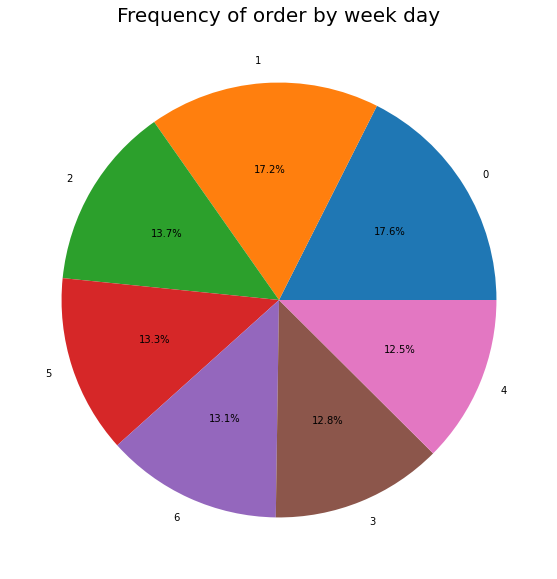

In [ ]:
plt.figure(figsize=(10,10))
data = orders_data['order_dow'].value_counts()
day = data.index
sizes = data.values
plt.pie(sizes, labels=day, autopct='%1.1f%%')
plt.title('Frequency of order by week day',fontsize=20) 
plt.show()

Text(0.5, 0, 'Hour of day')

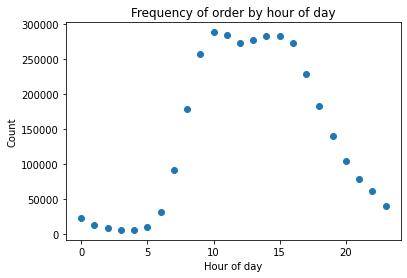

In [ ]:
data = orders_data['order_hour_of_day'].value_counts()
points = data.index 
frequency = data.values 
plt.scatter(points, frequency) 
plt.title('Frequency of order by hour of day') 
plt.ylabel('Count') 
plt.xlabel('Hour of day')

**When do they order again**

Text(0, 0.5, 'Days since last order')

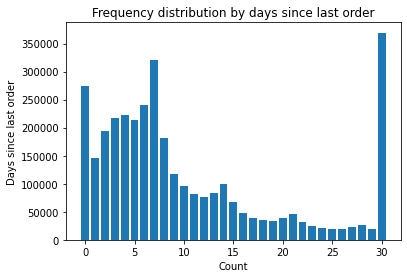

In [ ]:
data = orders_data['days_since_prior_order'].value_counts()
points = data.index 
frequency = data.values 
plt.bar(points, frequency) 
plt.title('Frequency distribution by days since last order') 
plt.xlabel('Count') 
plt.ylabel('Days since last order')

In [ ]:
order_products_prior_df = pd.merge(order_products_prior_data, products_data, on='product_id', how='left')


In [ ]:
order_products_prior_df.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13
5,2,17794,6,1,Carrots,83,4
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13
8,2,43668,9,0,Classic Blend Cole Slaw,123,4
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16


In [ ]:
order_products_prior_df = pd.merge(order_products_prior_df, aisles_data, on='aisle_id', how='left')

**Aisle Distribution**

In [ ]:
data = order_products_prior_df['aisle'].value_counts().head(20)
data

fresh fruits                     3642188
fresh vegetables                 3418021
packaged vegetables fruits       1765313
yogurt                           1452343
packaged cheese                   979763
milk                              891015
water seltzer sparkling water     841533
chips pretzels                    722470
soy lactosefree                   638253
bread                             584834
refrigerated                      575881
frozen produce                    522654
ice cream ice                     498425
crackers                          458838
energy granola bars               456386
eggs                              452134
lunch meat                        395130
frozen meals                      390299
baby food formula                 382456
fresh herbs                       377741
Name: aisle, dtype: int64

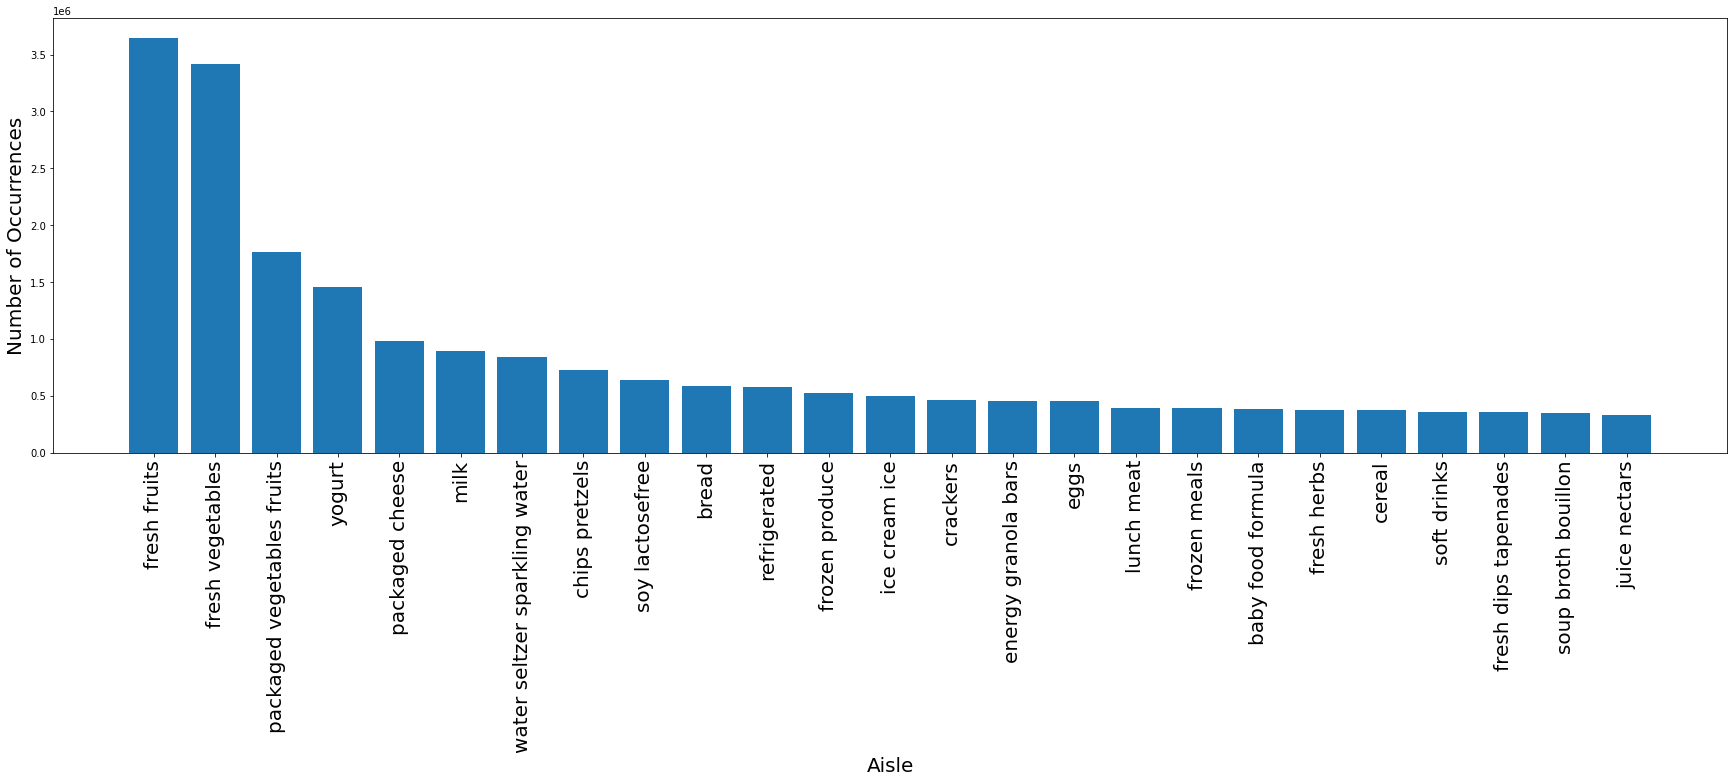

In [ ]:
data = order_products_prior_df['aisle'].value_counts().head(25)
plt.figure(figsize=(30,8))
points = data.index 
frequency = data.values 
plt.bar(points, frequency) 
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Aisle', fontsize=20)
plt.xticks(rotation='vertical',fontsize=20)
plt.show()

In [ ]:
order_products_prior_df = pd.merge(order_products_prior_df, departments_data, on='department_id', how='left')


**Department Distribution**

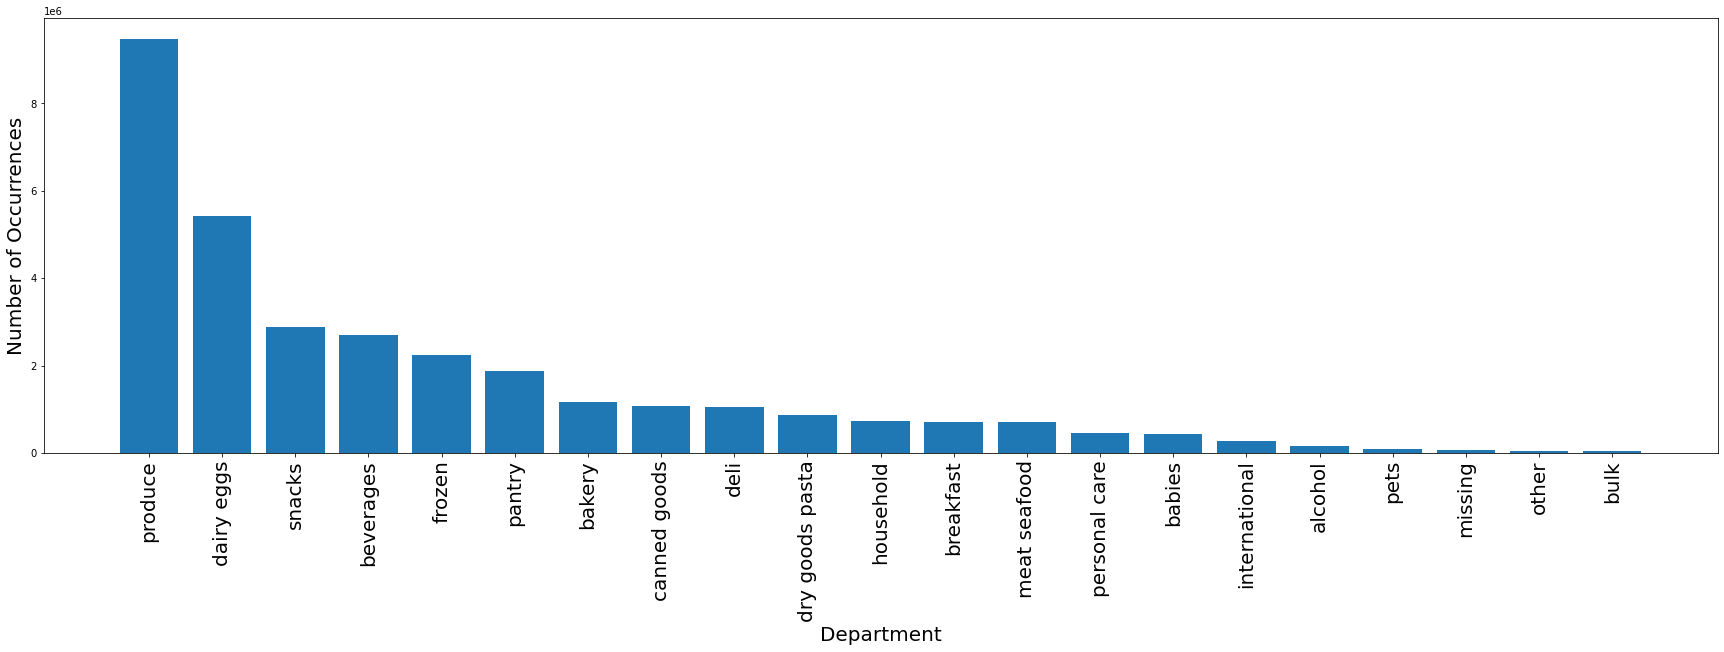

In [ ]:
data = order_products_prior_df['department'].value_counts()
plt.figure(figsize=(30,8))
points = data.index 
frequency = data.values 
plt.bar(points, frequency) 
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Department', fontsize=20)
plt.xticks(rotation='vertical',fontsize=20)
plt.show()

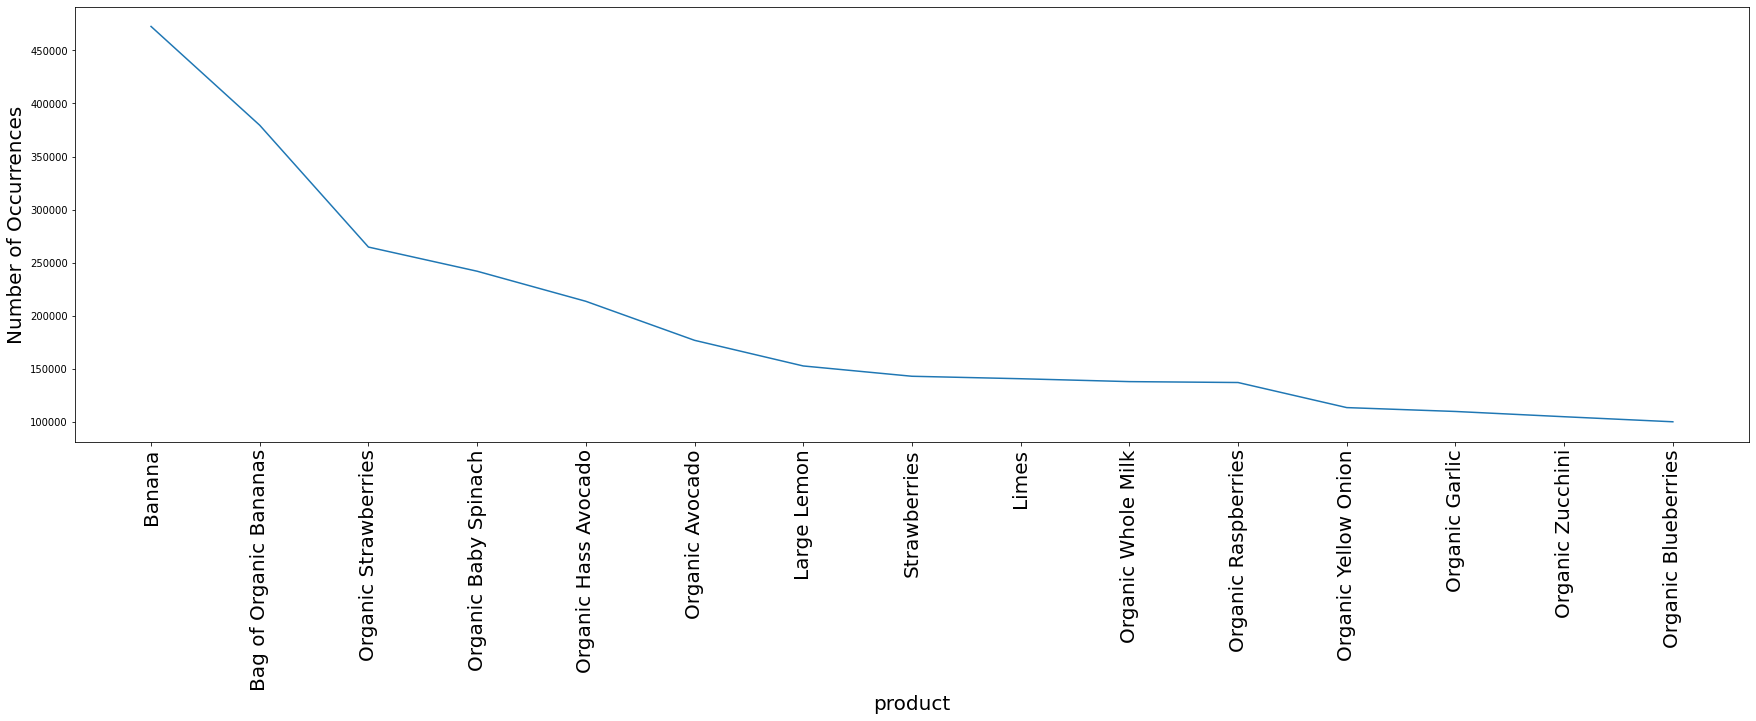

In [ ]:
data = order_products_prior_df['product_name'].value_counts().head(15)
plt.figure(figsize=(30,8))
points = data.index 
frequency = data.values 
plt.plot(points, frequency) 
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('product', fontsize=20)
plt.xticks(rotation='vertical',fontsize=20)
plt.show()


In [ ]:
data = order_products_prior_df['reordered'].value_counts(normalize=True)
data

1    0.589697
0    0.410303
Name: reordered, dtype: float64

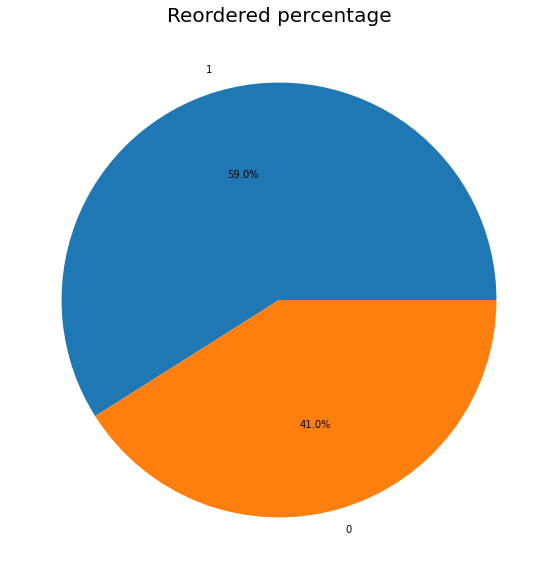

In [ ]:
plt.figure(figsize=(10,10))
data = order_products_prior_df['reordered'].value_counts()
reorder = data.index
sizes = data.values
plt.pie(sizes, labels=reorder, autopct='%1.1f%%')
plt.title('Reordered percentage',fontsize=20) 
plt.show()

In [ ]:
grouped_df = order_products_prior_df.groupby(["department"])["reordered"].aggregate("mean").reset_index()
grouped_df

,department,reordered
0,alcohol,0.569924
1,babies,0.578971
2,bakery,0.628141
3,beverages,0.653460
4,breakfast,0.560922
5,bulk,0.577040
6,canned goods,0.457405
7,dairy eggs,0.669969
8,deli,0.607719
9,dry goods pasta,0.461076


**Departments with many reorders**

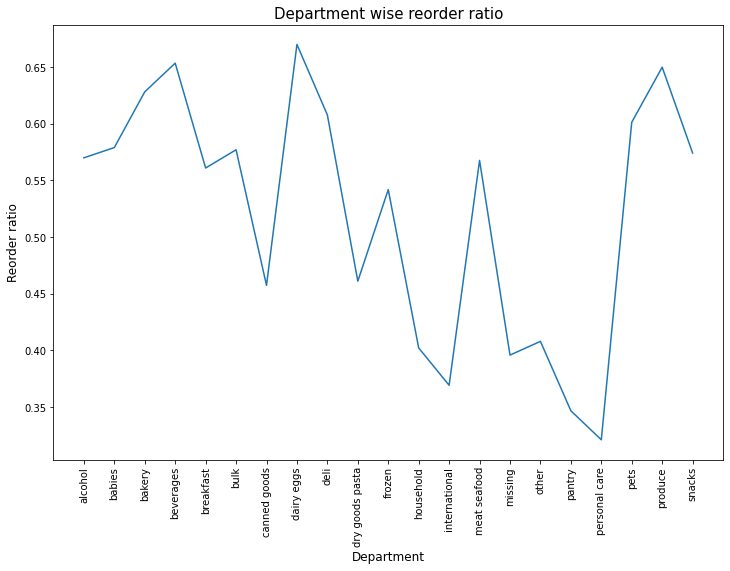

In [ ]:
grouped_df = order_products_prior_df.groupby(["department"])["reordered"].aggregate("mean").reset_index()
plt.figure(figsize=(12,8))
plt.plot(grouped_df['department'].values, grouped_df['reordered'].values)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


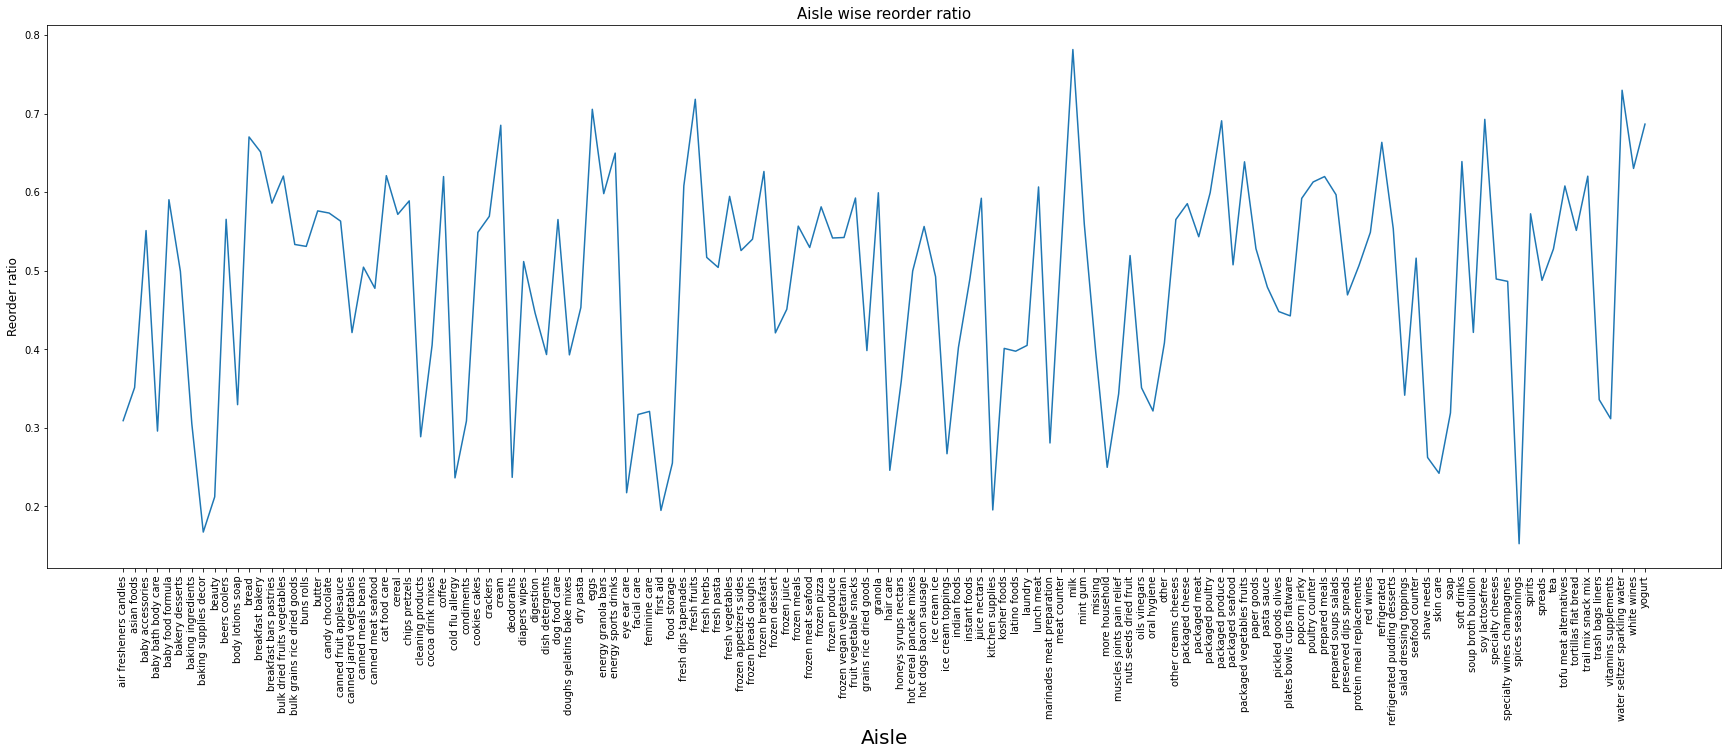

In [ ]:
grouped_df = order_products_prior_df.groupby(["aisle"])["reordered"].aggregate("mean").reset_index()
plt.figure(figsize=(30,10))
plt.plot(grouped_df['aisle'].values, grouped_df['reordered'].values)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Aisle', fontsize=20)
plt.title("Aisle wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

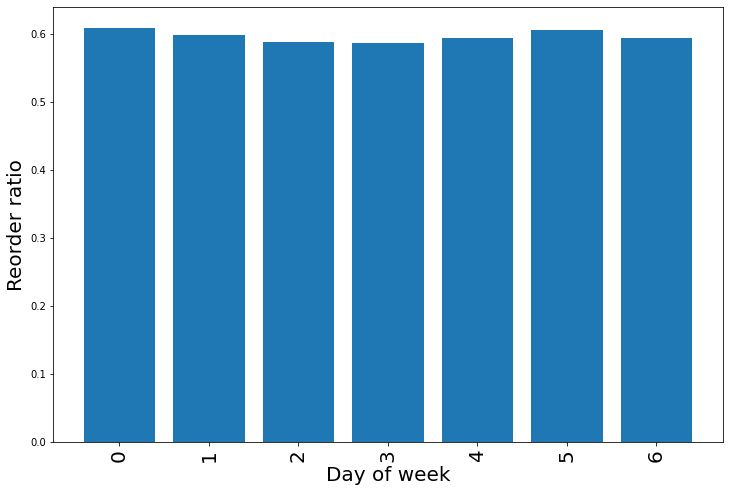

In [ ]:
order_products_train_df = pd.merge(order_products_train_data, orders_data, on='order_id', how='left')
grouped_df = order_products_train_df.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()
plt.figure(figsize=(12,8))
points = grouped_df['order_dow'].values  
frequency =  grouped_df['reordered'].values
plt.bar(points, frequency) 
plt.ylabel('Reorder ratio', fontsize=20)
plt.xlabel('Day of week', fontsize=20)
plt.xticks(rotation='vertical',fontsize=20)
plt.show()


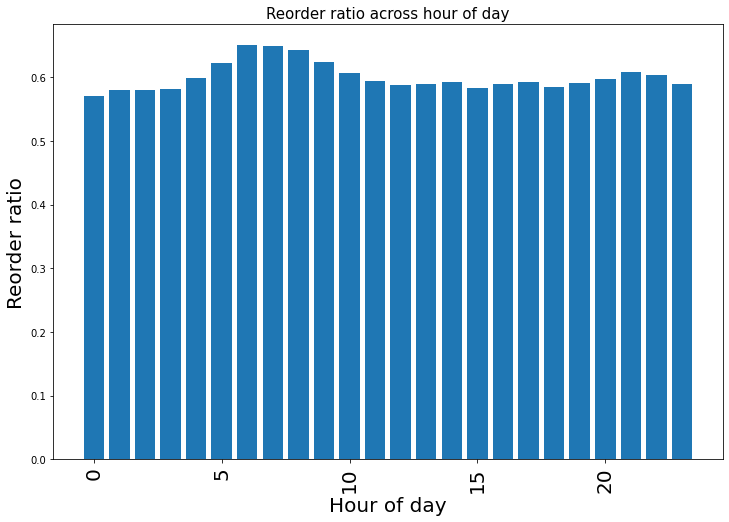

In [ ]:
grouped_df = order_products_train_df.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
plt.figure(figsize=(12,8))
points = grouped_df['order_hour_of_day'].values 
frequency =  grouped_df['reordered'].values
plt.bar(points, frequency) 
plt.ylabel('Reorder ratio', fontsize=20)
plt.xlabel('Hour of day', fontsize=20)
plt.title("Reorder ratio across hour of day", fontsize=15)
plt.xticks(rotation='vertical',fontsize=20)
plt.show()

In [ ]:
df_orders_prior = orders_data.loc[orders_data['eval_set'] == 'prior']     
df_orders_train = orders_data.loc[orders_data['eval_set'] == 'train']      
df_orders_test = orders_data.loc[orders_data['eval_set'] == 'test']       


In [ ]:
df_prior_merged = pd.merge(order_products_prior_data, df_orders_prior, on = 'order_id')
df_prior_merged.drop('eval_set',axis=1)
df_prior_merged.head(5)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [ ]:
order_per_prod = pd.DataFrame()
order_per_prod['prod_num_orders'] = order_products_prior_data.groupby(order_products_prior_data.product_id).size().astype(np.int32) 
order_per_prod['prod_reorder_times'] = order_products_prior_data['reordered'].groupby(order_products_prior_data.product_id).sum().astype(np.int32) 
order_per_prod = order_per_prod.reset_index()
print(order_per_prod.head(5))
df_products_merged = pd.merge(products_data, order_per_prod, on = 'product_id')


   product_id  prod_num_orders  prod_reorder_times
0           1             1852                1136
1           2               90                  12
2           3              277                 203
3           4              329                 147
4           5               15                   9


In [ ]:
df_products = pd.DataFrame()
df_products['prod_avg_interval'] = df_prior_merged.groupby('product_id')['days_since_prior_order'].aggregate('mean').astype(np.float16)  
df_products['prod_dow_std'] =  df_prior_merged.groupby('product_id')['order_dow'].aggregate('std').astype(np.float16) 
df_products['prod_hour_std']=  df_prior_merged.groupby('product_id')['order_hour_of_day'].aggregate('std').astype(np.float16) 
df_products['prod_dow_median']=  df_prior_merged.groupby('product_id')['order_dow'].aggregate('median').astype(np.float16) 
df_products['prod_hour_median'] =  df_prior_merged.groupby('product_id')['order_hour_of_day'].aggregate('median').astype(np.float16) 
df_products_merged = df_products_merged.merge(df_products, on = 'product_id', how = 'left')
df_products_merged.to_csv('/content/drive/My Drive/Grocart_Project/df_products_merged.csv', index = False)
df_products_merged.head(5)

,product_id,product_name,aisle_id,department_id,prod_num_orders,prod_reorder_times,prod_avg_interval,prod_dow_std,prod_hour_std,prod_dow_median,prod_hour_median
0,1,Chocolate Sandwich Cookies,61,19,1852,1136,9.882812,1.825195,4.253906,3.0,13.0
1,2,All-Seasons Salt,104,13,90,12,10.132812,2.152344,3.941406,3.0,13.0
2,3,Robust Golden Unsweetened Oolong Tea,94,7,277,203,9.914062,2.205078,4.515625,2.0,12.0
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,329,147,12.945312,2.156250,4.371094,2.0,14.0
4,5,Green Chile Anytime Sauce,5,13,15,9,11.601562,2.283203,4.546875,3.0,11.0


In [ ]:
df_user = pd.DataFrame()
df_user['user_num_orders'] = df_orders_prior.groupby('user_id').size().astype(np.int16)                
df_user['user_num_prods'] = df_prior_merged.groupby('user_id').size().astype(np.int16)                 
df_user['user_avg_num_prods'] = df_user['user_num_prods']/df_user['user_num_orders']                   
df_user['user_avg_interval'] = df_orders_prior.groupby('user_id')['days_since_prior_order'].mean().astype(np.float16)   
df_user['user_dow_std'] = df_orders_prior.groupby('user_id')['order_dow'].std().astype(np.float16)   
df_user['user_hour_std'] = df_orders_prior.groupby('user_id')['order_hour_of_day'].std().astype(np.float16)   
df_user['user_dow_median'] =  df_orders_prior.groupby('user_id')['order_dow'].median().astype(np.float16)            
df_user['user_hour_median'] =  df_orders_prior.groupby('user_id')['order_hour_of_day'].median().astype(np.float16)   
df_user = df_user.reset_index()
df_user.head(5)


,user_id,user_num_orders,user_num_prods,user_avg_num_prods,user_avg_interval,user_dow_std,user_hour_std,user_dow_median,user_hour_median
0,1,10,59,5.900000,17.593750,1.269531,3.591797,2.5,8.5
1,2,14,195,13.928571,14.140625,1.231445,1.554688,2.0,10.0
2,3,12,88,7.333333,11.085938,1.311523,1.443359,0.5,16.0
3,4,5,18,3.600000,11.000000,0.836426,1.672852,5.0,13.0
4,5,4,37,9.250000,10.000000,1.500000,2.828125,2.0,17.0


In [ ]:
temp_user_reorder_ratio = df_prior_merged.groupby(by = 'user_id')['reordered'].aggregate('mean').to_frame('user_reorder_ratio').astype(np.float16)
temp_user_reorder_ratio = temp_user_reorder_ratio.reset_index()
df_user = df_user.merge(temp_user_reorder_ratio, on = 'user_id', how = 'left')
df_user.to_csv('/content/drive/My Drive/Grocart_Project/df_user.csv', index = False)
df_user.head(5)

,user_id,user_num_orders,user_num_prods,user_avg_num_prods,user_avg_interval,user_dow_std,user_hour_std,user_dow_median,user_hour_median,user_reorder_ratio
0,1,10,59,5.900000,17.593750,1.269531,3.591797,2.5,8.5,0.694824
1,2,14,195,13.928571,14.140625,1.231445,1.554688,2.0,10.0,0.476807
2,3,12,88,7.333333,11.085938,1.311523,1.443359,0.5,16.0,0.625000
3,4,5,18,3.600000,11.000000,0.836426,1.672852,5.0,13.0,0.055542
4,5,4,37,9.250000,10.000000,1.500000,2.828125,2.0,17.0,0.378418


In [ ]:
df_user_product = df_prior_merged.groupby(['user_id','product_id'])['reordered'].aggregate(['count', 'sum']).reset_index()
df_user_product.columns = ['user_id', 'product_id', 'user_product_num_order', 'user_product_num_reorder']
temp_spec_first_order_num = df_prior_merged.groupby(by=['user_id', 'product_id'])['order_number'].aggregate('min').to_frame('user_product_first_order_num').reset_index() 
df_user_product = pd.merge(df_user_product, temp_spec_first_order_num, how = 'left', on = ['user_id','product_id'])
temp_df_total_num_order = df_user[['user_id', 'user_num_orders']]   
df_user_product = pd.merge(df_user_product, temp_df_total_num_order, how = 'left', on = 'user_id')
df_user_product['user_product_order_range'] =  df_user_product['user_num_orders'] - df_user_product['user_product_first_order_num'] + 1
df_user_product['user_product_order_ratio'] = (df_user_product['user_product_num_order']/df_user_product['user_product_order_range']).astype(np.float16) 
del df_user_product['user_num_orders']
df_user_product.head(5)


,user_id,product_id,user_product_num_order,user_product_num_reorder,user_product_first_order_num,user_product_order_range,user_product_order_ratio
0,1,196,10,9,1,10,1.000000
1,1,10258,9,8,2,9,1.000000
2,1,10326,1,0,5,6,0.166626
3,1,12427,10,9,1,10,1.000000
4,1,13032,3,2,2,9,0.333252


In [ ]:
df_user_pro = pd.DataFrame()
df_user_pro['user_product_avg_cart_seq'] = df_prior_merged.groupby(['user_id','product_id'])['add_to_cart_order'].aggregate('mean').astype(np.float16)
df_user_pro['user_product_avg_interval'] = df_prior_merged.groupby(['user_id','product_id'])['days_since_prior_order'].aggregate('mean').astype(np.float16)
df_user_pro['user_product_dow_median'] = df_prior_merged.groupby(['user_id','product_id'])['order_dow'].aggregate('median').astype(np.float16)
df_user_pro['user_product_hour_median'] = df_prior_merged.groupby(['user_id','product_id'])['order_hour_of_day'].aggregate('median').astype(np.float16)
df_user_product = pd.merge(df_user_product, df_user_pro, how = 'left', on = ['user_id', 'product_id'])
df_user_product.to_csv('/content/drive/My Drive/Grocart_Project/df_user_product.csv', index = False)
df_user_product.head(5)


,user_id,product_id,user_product_num_order,user_product_num_reorder,user_product_first_order_num,user_product_order_range,user_product_order_ratio,user_product_avg_cart_seq,user_product_avg_interval,user_product_dow_median,user_product_hour_median
0,1,196,10,9,1,10,1.000000,1.400391,17.593750,2.5,8.5
1,1,10258,9,8,2,9,1.000000,3.333984,19.562500,3.0,9.0
2,1,10326,1,0,5,6,0.166626,5.000000,28.000000,4.0,15.0
3,1,12427,10,9,1,10,1.000000,3.300781,17.593750,2.5,8.5
4,1,13032,3,2,2,9,0.333252,6.332031,21.671875,3.0,8.0


In [ ]:
df_hour = pd.DataFrame()
df_hour['hour_orders'] = df_prior_merged.groupby('order_hour_of_day').size().astype(np.int32)
df_hour.to_csv('/content/drive/My Drive/Grocart_Project/df_hour.csv', index = False)
df_hour.head(5)

,hour_orders
order_hour_of_day,
0,218948
1,115786
2,69434
3,51321
4,53283


In [ ]:
df_dow = pd.DataFrame()
df_dow['dow_orders'] = df_prior_merged.groupby('order_dow').size().astype(np.int32)
df_dow.to_csv('/content/drive/My Drive/Grocart_Project/df_dow.csv', index = False)
df_dow.head(5)

,dow_orders
order_dow,
0,6209666
1,5665856
2,4217798
3,3844117
4,3787215
